# MINISTRY OF TRADE IMPORT AND EXPORT FOR THE YEARS 2014 AND 2015

### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Retrieving Datasets

In [82]:
# Import 2014
imp_tw_fourteen = pd.read_csv("Data on TOP 100 IMPORT PRODUCTS 2014.csv")

# Export 2014
exp_tw_fourteen = pd.read_csv("Data on TOP 100 EXPORT PRODUCTS 2014.csv")

# Import 2015
imp_tw_fifteen = pd.read_csv("Data on TOP 100 IMPORT PRODUCTS 2015.csv")

# Export 2015
exp_tw_fifteen = pd.read_csv("Data on TOP 100 EXPORT PRODUCTS 2015.csv")

### 2014 Imports

In [83]:
# Shape
imp_tw_fourteen.shape

# Info on Dataset
imp_tw_fourteen.info()

# Checking null values
imp_tw_fourteen.isnull().sum()

# Viewing data
imp_tw_fourteen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE IMPORT FOR 2014  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


,TRADE IMPORT FOR 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2523100000,Cement clinkers,1646138259,3866159818
2,8705900010,"Other special purpose motor vehicle, nes, new",1199512148,737438.61
3,2709000000,Petroleum oils and oils obtained from bitum...,1149418088,3857276.603
4,8502399000,Other generating sets : Other: Other,907226467.7,13009081.13


There are no null values

In [84]:
# Renaming the columns
imp_tw_fourteen.columns = ['hs_code','item_description','custom_value(ghs)','net_weight(kgs)'] 

# Removing unnecessary row
imp_tw_fourteen = imp_tw_fourteen.drop(0, axis = 0)
imp_tw_fourteen = imp_tw_fourteen.reset_index(drop = True)

In [85]:
# Converting columns to numeric 
imp_tw_fourteen['custom_value(ghs)'] = pd.to_numeric(imp_tw_fourteen['custom_value(ghs)'])
imp_tw_fourteen['net_weight(kgs)'] = pd.to_numeric(imp_tw_fourteen['net_weight(kgs)'])

# Formating appearance of float numbers
pd.options.display.float_format = '{:.2f}'.format

In [86]:
# Functions 

def usd_converter(series):
    usdversion = series/3.2
    return usdversion

def space_stripper(series):
    series = series.str.strip(" ")
    return series

def to_ton(series):
    tonseries = series/1000
    return tonseries

def percent_calculator(series):
    prcnt = (series/sum(series))*100
    return prcnt

def hs_code_iter(table):
    j = []
    for row in table['hs_code']:
        v = row[:2]
        j.append(v)
    return j

def hs_code_header(table):
    h = pd.DataFrame(hs_code_iter(table))
    h.columns =['head']
    return h['head']

# custom value in usd column
imp_tw_fourteen['custom_value(usd)'] = usd_converter(imp_tw_fourteen['custom_value(ghs)'])

# net weight in tonnes column
imp_tw_fourteen['net_weight(tons)'] = to_ton(imp_tw_fourteen['net_weight(kgs)'])

# percentage of total net weight
imp_tw_fourteen['net_weight_percent'] = percent_calculator(imp_tw_fourteen['net_weight(tons)'])

# percentage of total custom value
imp_tw_fourteen['custom_value_percentage'] = percent_calculator(imp_tw_fourteen['custom_value(usd)'])

# Removing white spaces from hs code
imp_tw_fourteen['hs_code'] = space_stripper(imp_tw_fourteen['hs_code'])

# Creating and Populating hs code head column
imp_tw_fourteen['hs_code_head'] = hs_code_header(imp_tw_fourteen) 

In [87]:
imp_tw_fourteen

,hs_code,item_description,custom_value(ghs),net_weight(kgs),custom_value(usd),net_weight(tons),net_weight_percent,custom_value_percentage,hs_code_head
0,2523100000,Cement clinkers,1646138259.00,3866159818.00,514418205.94,3866159.82,49.66,7.04,25
1,8705900010,"Other special purpose motor vehicle, nes, new",1199512148.00,737438.61,374847546.25,737.44,0.01,5.13,87
2,2709000000,Petroleum oils and oils obtained from bitum...,1149418088.00,3857276.60,359193152.50,3857.28,0.05,4.91,27
3,8502399000,Other generating sets : Other: Other,907226467.70,13009081.13,283508271.16,13009.08,0.17,3.88,85
4,8708990000,"Parts and accessories, nes, for vehicles of...",721513001.90,3282918.06,225472813.09,3282.92,0.04,3.08,87
...,...,...,...,...,...,...,...,...,...
95,3904100000,"Polyvinyl chloride, not mixed with other su...",71003613.11,22152806.27,22188629.10,22152.81,0.28,0.30,39
96,8409990000,Parts for compression-ignition internal com...,70386491.63,1147439.95,21995778.63,1147.44,0.01,0.30,84
97,8703332050,"Other vehicles, with compression-ignition i...",70364764.27,2528818.35,21988988.83,2528.82,0.03,0.30,87
98,7214200000,"Iron/Steel b&r, h/r, irregular coils with d...",70099151.94,39949979.61,21905984.98,39949.98,0.51,0.30,72


### 2014 Export

In [88]:
# Observing the dataset

# Shape
print(exp_tw_fourteen.shape,"\n")

# Info
print(exp_tw_fourteen.info(),"\n")

# null values check
print(exp_tw_fourteen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_fourteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2014  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE EXPORT FOR 2014    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2014                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            2709000000     Petroleum oils and oils obtained from bitum...   
2            7108131000                                       Gold bullion   
3            1801001100            Cocoa beans, superior quality raw beans   
4            710812

In [89]:
# Renaming columns 
exp_tw_fourteen.columns = ['hs_code', 'item_description','custom_value(ghs)','net_weight(kgs)']

# Removing unnecessary row
exp_tw_fourteen = exp_tw_fourteen.drop(0, axis = 0)
exp_tw_fourteen = exp_tw_fourteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_fourteen['custom_value(ghs)'] = pd.to_numeric(exp_tw_fourteen['custom_value(ghs)'])
exp_tw_fourteen['net_weight(kgs)'] = pd.to_numeric(exp_tw_fourteen['net_weight(kgs)'])

# Setting float display format
pd.options.display.float_format = '{:.2f}'.format

# Removing spaces form hs code column
exp_tw_fourteen['hs_code'] = space_stripper(exp_tw_fourteen['hs_code'])

# Creating hs code header column
exp_tw_fourteen['hs_code_head'] = hs_code_header(exp_tw_fourteen)

# Creating custom value in usd column
exp_tw_fourteen['custom_value(usd)'] = usd_converter(exp_tw_fourteen['custom_value(ghs)'])

# Creating ton column from net weight column
exp_tw_fourteen['net_weight(tons)'] = to_ton(exp_tw_fourteen['net_weight(kgs)'])

# Percent of total custom value
exp_tw_fourteen['custom_value_percentage'] = percent_calculator(exp_tw_fourteen['custom_value(usd)'])

# percentage of total net weight
exp_tw_fourteen['net_weight_percent'] = percent_calculator(exp_tw_fourteen['net_weight(tons)'])


### 2015 Import

In [90]:
# Observing the dataset

# Shape
print(imp_tw_fifteen.shape,"\n")

# Info
print(imp_tw_fifteen.info(),"\n")

# null values check
print(imp_tw_fifteen.isnull().sum(),"\n")

# First few rows in the dataset
print(imp_tw_fifteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE IMPORT FOR 2015  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE IMPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE IMPORT FOR 2015                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            2709000000     Petroleum oils and oils obtained from bitum...   
2            8703232050     Other vehicles, with spark-ignition interna...   
3            2523100000                                    Cement clinkers   
4            401110

In [91]:
# Renaming columns 
imp_tw_fifteen.columns = ['hs_code', 'item_description','custom_value(ghs)','net_weight(kgs)']

# Removing unnecessary row
imp_tw_fifteen = imp_tw_fifteen.drop(0, axis = 0)
imp_tw_fifteen = imp_tw_fifteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
imp_tw_fifteen['custom_value(ghs)'] = pd.to_numeric(imp_tw_fifteen['custom_value(ghs)'])
imp_tw_fifteen['net_weight(kgs)'] = pd.to_numeric(imp_tw_fifteen['net_weight(kgs)'])

# Setting float display format
pd.options.display.float_format = '{:.2f}'.format

# Removing spaces form hs code column
imp_tw_fifteen['hs_code'] = space_stripper(imp_tw_fifteen['hs_code'])

# Creating hs code header column
imp_tw_fifteen['hs_code_head'] = hs_code_header(imp_tw_fifteen)

# Creating custom value in usd column
imp_tw_fifteen['custom_value(usd)'] = usd_converter(imp_tw_fifteen['custom_value(ghs)'])

# Creating ton column from net weight column
imp_tw_fifteen['net_weight(tons)'] = to_ton(imp_tw_fifteen['net_weight(kgs)'])

# Percent of total custom value
imp_tw_fifteen['custom_value_percentage'] = percent_calculator(imp_tw_fifteen['custom_value(usd)'])

# percentage of total net weight
imp_tw_fifteen['net_weight_percent'] = percent_calculator(imp_tw_fifteen['net_weight(tons)'])


### 2015 Export

In [92]:
# Observing the dataset

# Shape
print(exp_tw_fifteen.shape,"\n")

# Info
print(exp_tw_fifteen.info(),"\n")

# null values check
print(exp_tw_fifteen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_fifteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2015  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE EXPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2015                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            7108131000                                       Gold bullion   
2            1801001100            Cocoa beans, superior quality raw beans   
3            2709000000     Petroleum oils and oils obtained from bitum...   
4            710812

In [93]:
# Renaming columns 
exp_tw_fifteen.columns = ['hs_code', 'item_description','custom_value(ghs)','net_weight(kgs)']

# Removing unnecessary row
exp_tw_fifteen = exp_tw_fifteen.drop(0, axis = 0)
exp_tw_fifteen = exp_tw_fifteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_fifteen['custom_value(ghs)'] = pd.to_numeric(exp_tw_fifteen['custom_value(ghs)'])
exp_tw_fifteen['net_weight(kgs)'] = pd.to_numeric(exp_tw_fifteen['net_weight(kgs)'])

# Setting float display format
pd.options.display.float_format = '{:.2f}'.format

# Removing spaces form hs code column
exp_tw_fifteen['hs_code'] = space_stripper(exp_tw_fifteen['hs_code'])

# Creating hs code header column
exp_tw_fifteen['hs_code_head'] = hs_code_header(exp_tw_fifteen)

# Creating custom value in usd column
exp_tw_fifteen['custom_value(usd)'] = usd_converter(exp_tw_fifteen['custom_value(ghs)'])

# Creating ton column from net weight column
exp_tw_fifteen['net_weight(tons)'] = to_ton(exp_tw_fifteen['net_weight(kgs)'])

# Percent of total custom value
exp_tw_fifteen['custom_value_percentage'] = percent_calculator(exp_tw_fifteen['custom_value(usd)'])

# Percentage of total net weight
exp_tw_fifteen['net_weight_percent'] = percent_calculator(exp_tw_fifteen['net_weight(tons)'])


In [94]:
# sns.lineplot(x = imp_tw_fourteen['hs_code'], y = imp_tw_fourteen['custom_value_percentage'])
# plt.xticks(rotation = 60)
# plt.figure(figsize=(20,20), dpi= 300)
# plt.show()

In [95]:
tot_c_val2014 = sum(imp_tw_fourteen["custom_value(usd)"])+sum(exp_tw_fourteen["custom_value(usd)"])
print(f'Total Custom Value for 2014 was {tot_c_val2014}usd')

Total Custom Value for 2014 was 19096739131.837498usd


In [96]:
tot_c_val2015 = sum(imp_tw_fifteen["custom_value(usd)"])+sum(exp_tw_fifteen["custom_value(usd)"])
print(f'Total Custom Value for 2015 was {sum(imp_tw_fifteen["custom_value(usd)"])+sum(exp_tw_fifteen["custom_value(usd)"])}usd')

Total Custom Value for 2015 was 22015360424.946873usd


In [97]:
c_val_inc = tot_c_val2015 - tot_c_val2014
print(f"There was an increase in value of {c_val_inc}usd in 2015 over 2014")

There was an increase in value of 2918621293.109375usd in 2015 over 2014


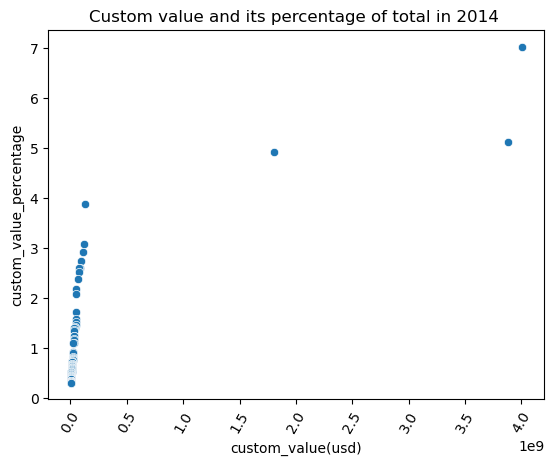

In [98]:
sns.scatterplot(y = imp_tw_fourteen['custom_value_percentage'], x = exp_tw_fourteen['custom_value(usd)'])
plt.xticks(rotation = 60)
plt.title("Custom value and its percentage of total in 2014 ")
plt.show()

Most value was obtained through a lot of items with lower value than those with higher value

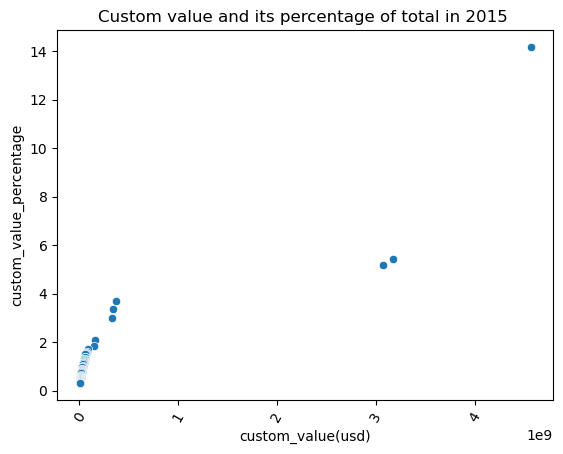

In [99]:
sns.scatterplot(y = imp_tw_fifteen['custom_value_percentage'], x = exp_tw_fifteen['custom_value(usd)'])
plt.xticks(rotation = 60)
plt.title("Custom value and its percentage of total in 2015 ")
plt.show()


This year has a very large percentage for a specific value source in comparison with 2014. 
It creates a curiosity to investigate further. The difference is very large

In [100]:
!pip install benfordslaw

In [101]:
import benfordslaw

In [102]:
imp_exp = pd.concat([imp_tw_fourteen, imp_tw_fifteen, exp_tw_fourteen, exp_tw_fifteen], axis = 0)

In [103]:
# hs_code_cat = {
#     "animals and products":["01","02","03","04","05"],
#     "vegetable products":['06',"07","08","09","10","11","12","13","14"],
#     "animal and vegetable oils, fats and waxes":["015"],
#     "prepared foodstuffs; beverages, spirits and vinegar; tobacco and substitutes":["16","17","18","19","20","21","22","23","24"],
#     "mineral products":["25","26","27"],
#     "products: chemical or allied industries":["28","29","30","31","32","33","34","35","36","37","38"],
#     "plastics and rubbers":["39"],
#     "raw hides, skins, leather":["40","41","42","43"],
#     "wood; corks; plaiting materials":["44","45","46","47","48","49"],
#     "textiles and textile articles":["50","51","52","53","54","55","56","57","58","59","60","61","62","63"],
#     "footwear; headgear; umbrellas; walking sticks; seat sticks; whips; riding-crops":["64","65","66","67"],
#     "stone, plaster, cement, asbestos, mica; ceramics; glass":["68","69","70"],
#     "pearls; precious stones, metals; imitation jewellery; coin":["71"],
#     "metals and metal articles":["72","73","74","75","76","77","78","79","80","81","82","83"],
#     "nuclear reactors, boilers, machinery; parts;":["84"],
#     "Electrical machinery; sound, television image recorders":"85",
#     "railway and parts thereof; traffic signaling equipment":"86",
#     "vehicles not railwaya nd parts and accessories":"87",
#     "aircraft, spacecraft, and parts":"88",
#     "ships, boats and floating structures":"89",
#     "optical, medical or surgical instruments; clocks and watches; musical instruments;":"90",
#     "Miscellaneous manufactured articles":["91","92","93","94","95","96","97","98"]
# }

# def cat_iter(table):
#     l = []
#     i = [range(1, 15)]
#     for key, value in hs_code_cat.items():
#         for value in hs_code_cat.items():
#             if value[i] == table['hs_code_head']:
#                 l.append(hs_code_cat.key)
#         return l
    
# def category_filler(table):
#     f = pd.DataFrame(cat_iter(table))
#     f.columns = 'category'
#     return f['category']

# imp_exp['category'] = category_filler(imp_exp)

In [110]:
conditions = [
    imp_exp['hs_code'].str.startswith('01|02|03|04|05'),
    imp_exp['hs_code'].str.startswith('06|07|08|09|10|11|12|13|14'),
    imp_exp['hs_code'].str.startswith('15'),
    imp_exp['hs_code'].str.startswith('16|17|18|19|20|21|22|23|24'),
    imp_exp['hs_code'].str.startswith('25|26|27'),
    imp_exp['hs_code'].str.startswith('28|29|30|31|32|33|34|35|36|37|38'),
    imp_exp['hs_code'].str.startswith('39'),
    imp_exp['hs_code'].str.startswith('40|41|42|43'),
    imp_exp['hs_code'].str.startswith('44|45|46|47|48|49'),
    imp_exp['hs_code'].str.startswith('50|51|52|53|54|55|56|57|58|59|0|61|62|63'),
    imp_exp['hs_code'].str.startswith('64|65|66|67'),
    imp_exp['hs_code'].str.startswith('68|69|70'),
    imp_exp['hs_code'].str.startswith('71'),
    imp_exp['hs_code'].str.startswith('72|73|74|75|76|77|78|79|80|81|82|83'),
    imp_exp['hs_code'].str.startswith('84'),
    imp_exp['hs_code'].str.startswith('85'),
    imp_exp['hs_code'].str.startswith('86'),
    imp_exp['hs_code'].str.startswith('87'),
    imp_exp['hs_code'].str.startswith('88'),
    imp_exp['hs_code'].str.startswith('89'),
    imp_exp['hs_code'].str.startswith('90'),
    imp_exp['hs_code'].str.startswith('91|92|93|94|95|96|97|98')
]

choices = [
    "animals and products",
    "vegetable products",
    "animal and vegetable oils, fats and waxes",
    "beverages, spirits and vinegar; tobacco",
    "mineral products",
    "products: chemical or allied industries",
    "plastics and rubbers",
    "raw hides, skins, leather",
    "wood; corks; plaiting materials",
    "textiles and textile articles",
    "footwear; headgear; umbrellas; walking sticks; seat sticks; whips; riding-crops",
    "stone, plaster, cement, asbestos, mica; ceramics; glass",
    "pearls; precious stones, metals; imitation jewellery; coin",
    "metals and metal articles",
    "nuclear reactors, boilers, machinery; parts;",
    "Electrical machinery; sound, television image recorders",
    "railway and parts thereof; traffic signaling equipment",
    "vehicles not railwaya nd parts and accessories",
    "aircraft, spacecraft, and parts",
    "ships, boats and floating structures",
    "optical, medical instruments; watches; musical instruments;",
    "Miscellaneous manufactured articles"
]

imp_exp['CATEGORY'] = np.select(conditions, choices, "Other")

In [111]:
imp_exp

,hs_code,item_description,custom_value(ghs),net_weight(kgs),custom_value(usd),net_weight(tons),net_weight_percent,custom_value_percentage,hs_code_head,CATEGORY
0,2523100000,Cement clinkers,1646138259.00,3866159818.00,514418205.94,3866159.82,49.66,7.04,25,Other
1,8705900010,"Other special purpose motor vehicle, nes, new",1199512148.00,737438.61,374847546.25,737.44,0.01,5.13,87,vehicles not railwaya nd parts and accessories
2,2709000000,Petroleum oils and oils obtained from bitum...,1149418088.00,3857276.60,359193152.50,3857.28,0.05,4.91,27,Other
3,8502399000,Other generating sets : Other: Other,907226467.70,13009081.13,283508271.16,13009.08,0.17,3.88,85,"Electrical machinery; sound, television image ..."
4,8708990000,"Parts and accessories, nes, for vehicles of...",721513001.90,3282918.06,225472813.09,3282.92,0.04,3.08,87,vehicles not railwaya nd parts and accessories
...,...,...,...,...,...,...,...,...,...,...
95,3823190000,Industrial monocarboxylic fatty acids & aci...,10467562.36,4023470.00,3271113.24,4023.47,0.02,0.02,38,Other
96,9015900000,Parts and accessories of surveying... instr...,10399820.59,22288.33,3249943.93,22.29,0.00,0.02,90,"optical, medical instruments; watches; musical..."
97,5208521000,"Cotton, plain weave, printed wax-bsd, cont ...",10333194.16,215558.29,3229123.17,215.56,0.00,0.02,52,Other
98,3923900000,"Articles for the packing of goods, of plast...",10271273.75,1236044.27,3209773.05,1236.04,0.01,0.02,39,plastics and rubbers


In [113]:
!pip install pandoc
#brew install pandoc

  Preparing metadata (setup.py) ... done
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 761.8 kB/s eta 0:00:00a 0:00:01
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=84e6c2d70e534794d9c9f54972f06d1e207c3358c0d07db7bf1d6e613d39734f
  Stored in directory: /Users/siliconaccra/Library/Caches/pip/wheels/1c/a9/c4/6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0fea
Successfully built pandoc
